In [1]:
import pandas as pd
from sklearn import tree, model_selection

In [2]:
train_data = pd.read_csv('train_data.csv', index_col=0)
test_data = pd.read_json('test_data.txt')[['Высота', 'Шерстист', 'Гавкает', 'Лазает по деревьям']]

In [3]:
train_data['Вид'] = (train_data['Вид'] == "собачка")


In [4]:
# Разделяем предикторы и отклик
y_train = train_data['Вид'].convert_dtypes(int)
X_train = train_data.drop('Вид', axis=1)

X_test = test_data

In [5]:
model = tree.DecisionTreeClassifier(criterion='entropy')

model.fit(X_train, y_train)
model.predict(X_test).sum()

49.0

[Text(0.5, 0.75, 'Шерстист <= 11.8\nentropy = 1.0\nsamples = 1000\nvalue = [500, 500]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 500\nvalue = [500, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 500\nvalue = [0, 500]')]

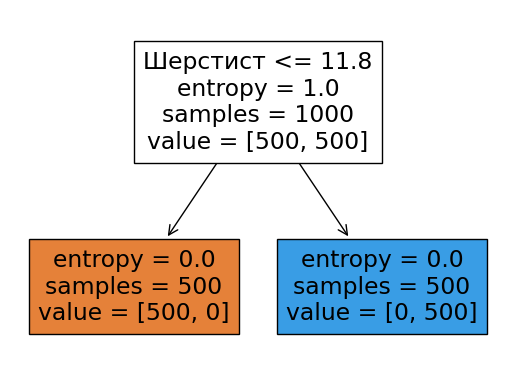

In [6]:
tree.plot_tree(decision_tree=model, feature_names=['Шерстист', 'Гавкает', 'Лазает по деревьям'], filled=True)

In [7]:
pd.Series(model_selection.cross_val_predict(model, X_train, y_train, cv=7)).value_counts()

1.0    500
0.0    500
Name: count, dtype: int64